# **VQA Implementation**



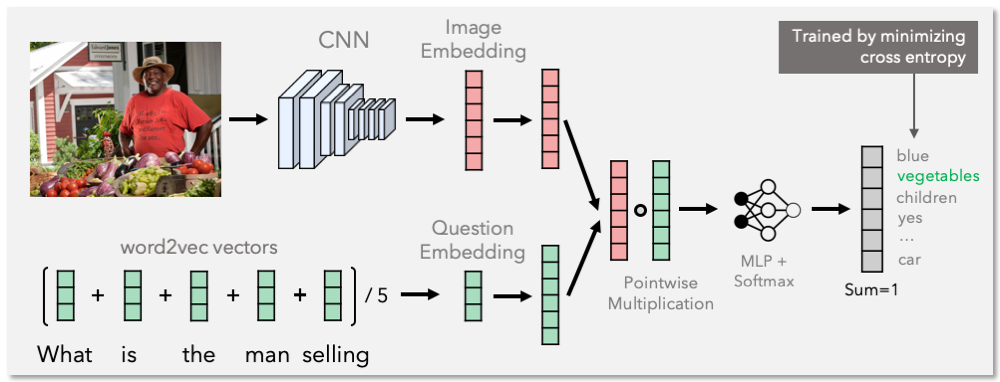

# **Importing required Libraries**

In [ ]:
import os
from os import path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Download the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# GD link - 'https://drive.google.com/drive/folders/18t_KdsrKpRxvQ5F5vEZzNc8hlTJOqZkJ?usp=sharing'
BASE_PATH = path.dirname('/content/drive/MyDrive/VQA')

In [ ]:
with open(path.join(BASE_PATH,'/content/drive/MyDrive/VQA/Train/questions.json'), 'r') as file:
  qs = json.load(file)   #. Load command is used for reading and writing files from json
  train_ques = [q[0] for q in qs] # q[0] for all the questions
  train_answers = [q[1] for q in qs]
  train_image_ids = [q[2] for q in qs]

In [ ]:
train_img = {}
dir_path = path.join(BASE_PATH,'/content/drive/MyDrive/VQA/Train/images')
for filename in os.listdir(dir_path):
  if filename.endswith('.png'):  # Consider the files that ends with .png
    image_id = int(filename[:-4])  #Mapping Images , Questions and the Answers to one ID
    train_img[image_id] = path.join(dir_path, filename)

In [ ]:
with open('/content/drive/MyDrive/VQA/answers.txt', 'r') as file:
  all_answers = [a.strip() for a in file]  # Remove all the spaces at beginning and Ending

In [ ]:
train_data={'Image':[train_img[image_id] for id in train_image_ids],
      'Question':train_ques,
      'Answer':train_answers
}
train_df=pd.DataFrame(train_data)
train_df.head(10)

,Image,Question,Answer
0,/content/drive/MyDrive/VQA/Train/images/803.png,what is the red shape?,triangle
1,/content/drive/MyDrive/VQA/Train/images/803.png,what is the color of the triangle?,red
2,/content/drive/MyDrive/VQA/Train/images/803.png,what is the color of the shape?,red
3,/content/drive/MyDrive/VQA/Train/images/803.png,does the image contain a circle?,no
4,/content/drive/MyDrive/VQA/Train/images/803.png,is there not a black shape in the image?,yes
5,/content/drive/MyDrive/VQA/Train/images/803.png,does the image contain a green shape?,no
6,/content/drive/MyDrive/VQA/Train/images/803.png,is a green shape present?,no
7,/content/drive/MyDrive/VQA/Train/images/803.png,is there a blue shape in the image?,no
8,/content/drive/MyDrive/VQA/Train/images/803.png,is no blue shape present?,yes
9,/content/drive/MyDrive/VQA/Train/images/803.png,is a yellow shape present?,no


# **Preprocessing**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
#Pre processing image

# Images are converted into Array

train_img = [img_to_array(load_img(img)) for img in train_df['Image']]

In [ ]:
#normalize the data

# Conversion of Images to Gray Scale

train_img=np.array(train_img)/255

In [ ]:
print("Train set size : ",train_img.shape)

# Total no. of questions answers and Images are shown

#64* 64 is length and Breadth , 3 is Channels (RGB)

Train set size :  (9673, 64, 64, 3)


In [ ]:
train_answer_indices = [all_answers.index(a) for a in train_df['Answer']]

#Creating Indices for Answers

In [ ]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_answer_indices)


In [ ]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer # Reduce each word to root word
lm = WordNetLemmatizer()

In [ ]:
# Remove stop words and lemmatize
train_corpus = []
for i in range(0,train_df.shape[0]):
    question = re.sub('[^a-zA-Z]',' ',train_df['Question'][i])
    question=question.lower()
    question=question.split()   # Considering only the words 
    
    question= [lm.lemmatize(word) for word in question if not word in stopwords.words('english')]  # Removing all the stop words
    question = ' '.join(question)
    train_corpus.append(question)

In [ ]:
train_corpus

['red shape',
 'color triangle',
 'color shape',
 'image contain circle',
 'black shape image',
 'image contain green shape',
 'green shape present',
 'blue shape image',
 'blue shape present',
 'yellow shape present',
 'brown shape',
 'color rectangle',
 'circle image',
 'triangle',
 'image contain triangle',
 'image contain black shape',
 'green shape present',
 'brown shape image',
 'blue shape',
 'color triangle',
 'rectangle',
 'rectangle',
 'image contain circle',
 'triangle present',
 'black shape',
 'image contain gray shape',
 'blue shape',
 'color circle',
 'color circle',
 'color shape',
 'color shape',
 'rectangle present',
 'image contain rectangle',
 'rectangle present',
 'triangle',
 'black shape',
 'image contain gray shape',
 'gray shape',
 'image contain green shape',
 'blue shape',
 'yellow shape present',
 'image contain yellow shape',
 'image contain teal shape',
 'image contain brown shape',
 'shape present',
 'shape image contain',
 'color circle',
 'color shape'

In [ ]:
voc_size=10000 #Vocubulary Size

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
# One hot representation
onehot_repr=[one_hot(words,voc_size)for words in train_corpus]
onehot_repr

[[6868, 8595],
 [3512, 4968],
 [3512, 8595],
 [7771, 3707, 6269],
 [9680, 8595, 7771],
 [7771, 3707, 2554, 8595],
 [2554, 8595, 436],
 [4883, 8595, 7771],
 [4883, 8595, 436],
 [983, 8595, 436],
 [4750, 8595],
 [3512, 7881],
 [6269, 7771],
 [4968],
 [7771, 3707, 4968],
 [7771, 3707, 9680, 8595],
 [2554, 8595, 436],
 [4750, 8595, 7771],
 [4883, 8595],
 [3512, 4968],
 [7881],
 [7881],
 [7771, 3707, 6269],
 [4968, 436],
 [9680, 8595],
 [7771, 3707, 8938, 8595],
 [4883, 8595],
 [3512, 6269],
 [3512, 6269],
 [3512, 8595],
 [3512, 8595],
 [7881, 436],
 [7771, 3707, 7881],
 [7881, 436],
 [4968],
 [9680, 8595],
 [7771, 3707, 8938, 8595],
 [8938, 8595],
 [7771, 3707, 2554, 8595],
 [4883, 8595],
 [983, 8595, 436],
 [7771, 3707, 983, 8595],
 [7771, 3707, 1309, 8595],
 [7771, 3707, 4750, 8595],
 [8595, 436],
 [8595, 7771, 3707],
 [3512, 6269],
 [3512, 8595],
 [6269, 436],
 [6269, 7771],
 [7771, 3707, 8938, 8595],
 [7771, 3707, 8938, 8595],
 [2554, 8595],
 [8595, 7771, 3707],
 [3512, 6269],
 [3512, 

In [ ]:
# convert to fixed size dimensions
sent_length=10
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)  # Old Sequence Have the same length
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0, 6868, 8595],
      dtype=int32)

In [ ]:
text_input=np.array(embedded_docs)

# **Model Building**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Multiply
from keras.layers import Dropout, Activation, GlobalMaxPool1D
from keras.layers import Input, Dense, LSTM,SimpleRNN , Embedding

# Custom CNN
im_input = Input(shape=train_img[0].shape) 
x1 = Conv2D(8, 3)(im_input)   # No. of Filters , Kernel size
x1 = MaxPooling2D()(x1)v  # Reduce the size
x1 = Conv2D(16, 3)(x1)
x1 = MaxPooling2D()(x1)
x1 = Flatten()(x1)
x1 = Dense(32, activation='relu')(x1)

#RNN
q_input = Input(shape=(sent_length,)) #Sentence Length
x2=Embedding(voc_size,64)(q_input)  # Converts Text to Vectors
x2=SimpleRNN (25, return_sequences=True)(x2) # 25  Neurons True = Many to Many False Many to one
x2 =GlobalMaxPool1D()(x2)
x2=Dropout(0.5)(x2)
x2 = Dense(32, activation='relu')(x2)
x2 = Dense(32, activation='relu')(x2)

# Bit Wise Multiplication
out = Multiply()([x1, x2])
out = Dense(32, activation='relu')(out)
out = Dense(len(all_answers), activation='softmax')(out)

model = Model(inputs=[im_input, q_input], outputs=out)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


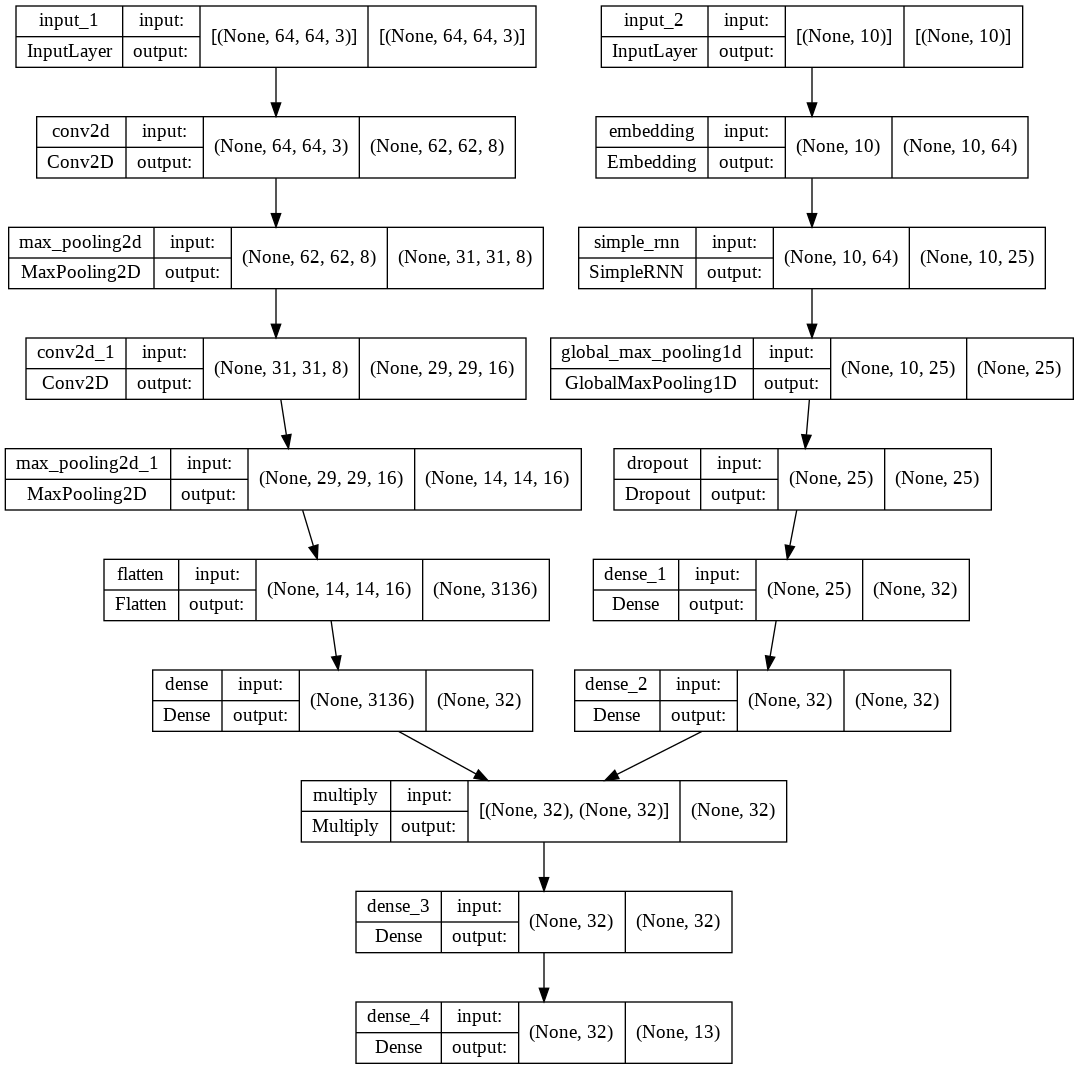

In [ ]:
keras.utils.plot_model(model, "mini.png", show_shapes=True)

In [ ]:
model.fit([train_img,text_input],y_train,epochs=5)

Epoch 1/5
303/303 [==============================] - 22s 66ms/step - loss: 1.3961 - accuracy: 0.3568
Epoch 2/5
303/303 [==============================] - 21s 70ms/step - loss: 1.1644 - accuracy: 0.4100
Epoch 3/5
303/303 [==============================] - 20s 66ms/step - loss: 1.1064 - accuracy: 0.4207
Epoch 4/5
303/303 [==============================] - 20s 66ms/step - loss: 1.0839 - accuracy: 0.4204
Epoch 5/5
303/303 [==============================] - 20s 65ms/step - loss: 1.0688 - accuracy: 0.4042
